# Programing exercise 3: Coupled oscillators

Due on Monday, 12.11.2018, 14.15h

### Total: 100 points

## The problem

Consider two coupled harmonic oscillators described by the Hamiltonian
$$
H=H_1 + H_2 + V =\frac{1}{2m}(p_1^2 + p_2^2) + \frac{1}{2}k(x_1^2 + x_2^2) + \frac{1}{2}\lambda(x_1 - x_2)^2
$$
We want to calculate the eigenvalues and eigenfunctions of this Hamiltonian and compare the dynamics of the corresponding classical problem. This is exactly solvable by transforming into center of mass and relatice coordinates. However, we also want to treat the coupling term lambda as a perturbation and solve the problem by expanding into eigenfunctions of the 2D harmonic oscillator and solve the resulting problem, both, perturbatively for small $\lambda$ and by exact diagonalization.

In [23]:
# load standard libraries

import numpy as np   # standard numerics library
import numpy.linalg as LA

import matplotlib.pyplot as plt

%matplotlib inline

### Exercise 1 (20 points)

Transform the problem into center of mass and relative coordinates using
$$
x_{CM}=(x_1+x_2)/2 \\
x_{rel}=(x_1-x_2)
$$ 
Write a function that returns the classical trajectory for initial conditions $\{x_1(t=0)=x_{10}, x_2(t=0)=x_{20}, \dot{x}_1(t=0)=v_{10}, \dot{x}_2(t=0)=v_{20}\}$.

Make a density plot of the potential and plot the classical trajectory for $m=k=1,\lambda=0.2$ and ${x_{10}=1,x_{20}=v_{10}=v_{20}=0}$ up to a time $t_f$ into it. Also, plot the positions of the two particles as a function of time. Observe the beating between center-of-mass and relative frequency.


First of we want to express our old coordinates with our new ones. We obtain:
$$
x_{1}=x_{CM}+\frac{x_{rel}}{2} \\
x_{2}=x_{CM}-\frac{x_{rel}}{2}
$$
Our hamiltonian now reads:
$$
H=m(\dot{x}_{CM}^2 + \frac{\dot{x}_{rel}^2}{4})+\frac{1}{2} k(\frac{x_{rel}^2}{2}+x_{CM}^2)+1/2 \lambda x_{rel}^2
$$
which we can uncouple to $H_{rel}$ and $H_{CM}$:


$$
H_{CM}=m\dot{x}_{CM}^2+\frac{1}{2} k x_{CM}^2 \\
H_{rel}=m\frac{\dot{x}_{rel}^2}{4}+x_{rel}^2(\frac{1}{4}k+\frac{1}{2} \lambda)
$$

Solving the Euler-Lagrange equation leads to:
$$
x_{rel}(t)=A cos(\omega_{rel}t)+B sin(\omega_{rel}t)\\
x_{CM}(t)=C cos(\omega_{CM}t)+D sin(\omega_{CM}t)\\
$$
with:
$$
w_{rel}=\sqrt{\frac{k+2\lambda}{m}}\\
w_{CM}=\sqrt{\frac{k}{2m}}
$$
As we want to calculate the trajectories for our initial bodies we transform back our system with the above shown relations and find:
$$
x_1(t)=Ccos(\omega_{CM}t)+Dsin(\omega_{CM}t)+\frac{Acos(\omega_{rel}t)+Bsin(\omega_{rel}t)}{2}\\
x_2(t)=Ccos(\omega_{CM}t)+Dsin(\omega_{CM}t)-\frac{Acos(\omega_{rel}t)+Bsin(\omega_{rel}t)}{2}
$$
with the given initial conditions we obtain for our coefficients A-D:
$$
A=x_{10}-x_{20}\\
B=\frac{v_{10}-v_{20}}{\omega_{rel}}\\
C=\frac{x_{10}+x_{20}}{2}\\
D=\frac{v_{10}+v_{20}}{2 \omega_{CM}}
$$

In [24]:
def potential(x1,x2,lam,k):
    return 1/2*k*(x1**2+x2**2)+lam*(x1-x2)**2
def potential_contour(x1,x2,lam,k):
    X,Y=np.meshgrid(x1,x2)
    Z=potential(X,Y,lam,k)
    plt.contour(X,Y,Z,cmap="RdGy")
    plt.colorbar()

In [25]:
def trajectories(x1,v1,x2,v2,m,lam,k,t):
    wrel=np.sqrt((k+2*lam)/m)
    wcm=np.sqrt(k/(2*m))
    A=x1-x2
    B=(v1-v2)/(wrel)
    C=(x1+x2)/2
    D=(v1+v2)/(2*wcm)
    x1=C*np.cos(wcm*t)+D*np.sin(wcm*t)+(A*np.cos(wrel*t)+B*np.sin(wrel*t))/2
    x2=C*np.cos(wcm*t)+D*np.sin(wcm*t)-(A*np.cos(wrel*t)+B*np.sin(wrel*t))/2
    return x1,x2

Text(0.5,1,'Contour plot for the potential with trajectory')

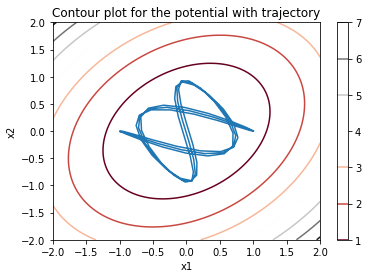

In [26]:
v1,v2,x2=0,0,0
x1=1
m,k,lam=1,1,0.2
t=np.linspace(0,40,100)
a,b=trajectories(x1,v1,x2,v2,m,lam,k,t)
x1=np.linspace(-2,2,100)
x2=np.linspace(-2,2,100)
lam=0.2
potential_contour(x1,x2,0.2,1)
plt.plot(a,b)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Contour plot for the potential with trajectory")

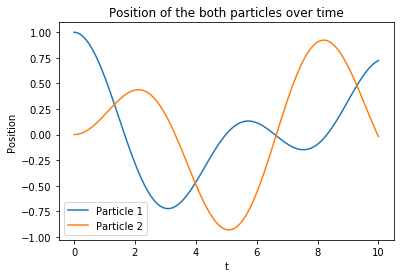

In [27]:
v1,v2,x2=0,0,0
x1=1
m,k,lam=1,1,0.2
t=np.linspace(0,10,100)
a,b=trajectories(x1,v1,x2,v2,m,lam,k,t)
plt.plot(t,a,label="Particle 1")
plt.plot(t,b,label="Particle 2")
plt.ylabel("Position")
plt.xlabel("t")
plt.title("Position of the both particles over time")
plt.legend()

In [28]:
def trajectory(m,k,lam,x1,v1,x2,v2,t):
    return (x1-x2)*np.cos(np.sqrt())

Very instructive 2D plotting tips:
https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

### Exercise 2 (10 points)

What are the exact quantum mechanical eigenenergies? 
Calculate the ground state energy perturbatively to second order in $\lambda$. Use the decomposition into ladder operators
$$
x/x_{HO} = (a^\dagger + a)/\sqrt{2}
$$
Show that the same result is obtained by Taylor expanding the exact ground state energy $E_0 = \hbar\omega/2(1+\sqrt{1+2\lambda/k}) $ to second order in $\lambda/k$.

Plot the exact and perturbative ground state energy as a function of $\lambda/k$.

$$ H = H_1 +H_2+V = H^0 + \lambda H^1$$with$$V=-\frac12 ( x_1-x_2)^2 \\ H^0 |n_1,n_2\rangle = \hbar \omega (n_1+n_2+1)|n_1,n_2\rangle$$ The eigenenergy is calculated as follows:
$$E_n= E^0_n + λE^1_n + λ^2E^2_n +\mathcal O (\lambda^3)$$
now we need to find the $E^i_0$:


**Pertubation Theory: **$$E^0_0=\hbar\omega(n_1+n_2+1)=
\boxed{\hbar\omega}$$
First order: $$E^1_0=
\langle n_1,n_2|H^1|n_1,n_2\rangle=
\langle n_1,n_2|\frac12 ( x_1-x_2)^2|n_1,n_2\rangle=\frac{\hbar}{4m\omega}\langle n_1,n_2| \left(a^\dagger_1+a_1-(a^\dagger_2+a_2)\right)^2|n_1,n_2\rangle=
\frac{\hbar}{4m\omega} \langle n_1,n_2|\left(a^\dagger_1+a_1-(a^\dagger_2+a_2)\right)\left(\sqrt{n_1+1}|n_1+1,n_2\rangle+\sqrt{n_1}|n_1-1,n_2\rangle-\sqrt{n_2+1}|n_1,n_2+1\rangle-\sqrt{n_2}|n_1,n_2-1\rangle\right)$$
we want the ground state so $n_1=n_2=0$ $$E^1_0=
\frac{\hbar}{4m\omega} \langle 0,0|\left(a^\dagger_1+a_1-a^\dagger_2-a_2\right)\left(|1,0\rangle-|0,1\rangle\right)=
\frac{\hbar}{2m\omega}=
\boxed{\frac{\hbar\omega}{2k}}$$
Second order: $$E^2_{0,0}=\sum_{m_1,m_2\neq 0}\frac{\left|\langle m^0_1,m^0_2|H^1|0,0\rangle\right|^2}{E_{0,0}^0-E_{m_1,m_2}^0}=
\sum_{m_1,m_2\neq 0}\frac{\left|\langle0,0|\frac{\hbar}{4m\omega}\left(a_1-a_2\right)|m_1,n_2\rangle\right|^2}{-\hbar\omega(m_1+m_2)}=
\left(\frac{\hbar}{4m\omega}\right)\left[\frac{|\sqrt{2}|^2}{-2\hbar\omega}+\frac{|-1|^2}{-2\hbar\omega}+\frac{|-1|^2}{-2\hbar\omega}+\frac{|\sqrt{2}|^2}{-2\hbar\omega}\right]=
\frac{-3\hbar}{16m^2\omega^3}=
\boxed{-\frac{3\hbar\omega}{16k^2}}
$$
So in the end we get:
$$E_0 \approx \hbar\omega\left(1+\dfrac{\lambda}{ 2k}-\dfrac{\lambda^2}{4k^2}\right)$$

**Taylor expanding $E_0 = \hbar\omega/2(1+\sqrt{1+2\lambda/k}) $:** 

Let $y:=\lambda/k$
$$\mathcal T[E_0,y,y_0=0]=\frac{\hbar\omega}2\left(1+\sqrt{1+2\cdot y_0} \cdot \frac{y^0}{0!}+ 1/\sqrt{1+2\cdot y_0}\cdot \frac{y^1}{1!} -\sqrt[-3/2]{1+2\cdot y_0}\cdot \frac{y^2}{2!} \right)+\mathcal O(y^3) \\ = \frac{\hbar\omega}2 \left( 2+y-\frac{y^2}2 \right) +\mathcal O(y^3) $$
$\Rightarrow E_0 \approx \dfrac{\hbar\omega}2 \left( 2+\dfrac{\lambda} k-\dfrac{\lambda^2}{2\omega^2} \right)=\hbar\omega\left(1+\dfrac{\lambda}{ 2k}-\dfrac{\lambda^2}{4k^2}\right)$

### Exercise 3 (40 points)

Expand the Hamiltonian in the eigenbasis of the 2D harmonic oscillators (use the same cutoff $N_1=N_2=N_{max}$ for both oscillator modes 1 and 2). 
For this, one can expand the perturbation term $\frac{1}{2}\lambda(x_1 - x_2)^2$ into ladder operators and then apply it to the unperturbed basis states.
How many non-zero elements will there be at most in each row? 

There are many ways of building the Hamiltonian matrix in the chosen basis. First, make sure you understand what the basis states are and how one would order them in a reasonable way.
A failsafe way to build up the Hamiltonian matrix is to iterate over all states of the bare basis and determine the matrix-elments it couples to. Another, arguably more elegant, way is to build the matrix representing the anihilation operator on the Hilbert space of one of the oscillators. The creation operator is then simply the transpose of that and the position operator can be built by adding the two. We have a 2D problem so we work in a Hilbert space that is a tensor product of the two Hilbert spaces of the oscillators. Thus, to represent the position operator $\hat{x}_1$ acting on oscillator 1 in the full Hilbert space  we have to use $\hat{x}_1 \otimes \mathbf{1}$, where $\mathbf{1}$ is the identity acting on the second subspace (see the numpy "eye" function). This can be achieved by using the Kronecker product. For multiplying or squaring operators you can use the numpy dot product function.
The second method might be less efficient if you want to exploit the sparsity of the problem but it is very handy since it requires only to build one operator explicitly and the rest is matrix algebra (or two if you use different basis sizes for the two oscillators).

Diagonalize the Hamiltonian and check your result by comparing the ground state energy to the exact result. How small can you make the basis such that the ground state energy still converged? (You should find that $N_1=N_2=5$, i.e. 25 basis states, is sufficient to get the ground state with good precision up to $\lambda=2$. Note that using a simple spatial grid to represent the wave function we would need much larger basis sizes!) Also look at some excited states, at least the lowest 6, make sure that your diagonalization results agree with the exact one, and understand the structure of the spectrum.

Bonus (not graded): This is of course still a problem that can be solved analytically, and thus we are complicating it by doing the basis set expansion. However, one could now use this method to apply it to non-integrable cases like a quartic (non-linear) coupling or even the quantum version of the Henon-Heiles problem, which does not separate and is classically chaotoic!
If you want to go beyond, try other potentials

We first on implement a short function to return us the ground state energy. We set k=1 for the following. Next on we define our anihilation and creation operators, use the matrix kronecker mulitiplication to get rid of the tensor products and lastly set our pertubation Matrix together. In the end we solve the Hamiltonian and obtain our eigenvalues with a pretty good accuracy. However, the need of N=5 could not always be shown.

In [29]:
#defining our groundstate energy
def E_ground(lam):
    return 1/2*(1+np.sqrt(1+2*lam))

In [30]:

from scipy.sparse import diags
#defining both of our x_1 and x_2 operators as matrices
def xoperators(N):
    ein=np.eye(N)
    diag=np.sqrt(np.linspace(1,N-1,N-1))
    a=diags(diag,1).toarray()
    ad=diags(diag,-1).toarray()
    #calculating the tensor/kroneckerprodukt and adding the results up to our x_1 and x_2 operators
    x1operator=1/np.sqrt(2)*(np.kron(a,ein)+np.kron(ad,ein))
    x2operator=1/np.sqrt(2)*(np.kron(ein,a)+np.kron(ein,ad))
    return x1operator,x2operator

In [31]:
def pertup(N,lam):
    #setting our pertubation term together
    x1,x2=xoperators(N)
    OP=lam/2*(np.matmul(x1,x1)+np.matmul(x2,x2)-np.matmul(x2,x1)-np.matmul(x1,x2))
    return OP,x1,x2

In [32]:
#function to give back our Eigenenergies
def solve_Problem(N,lam):
    #creating the needed operator
    OP,x1,x2=pertup(N,lam)
    #create unpertubed diagonalized hamiltonian matrix 
    I=diags(np.linspace(1/2,N-1/2,N),0).toarray()
    J=I
    x=np.eye(N)
    #adding the tensorproducts to obtain the unpertubed hamiltonian matrix, for both particles
    mat=np.kron(I,x)+np.kron(x,J)
    eigval,eigvek=np.linalg.eig(mat+OP)
    return eigval,eigvek

In [33]:
#testing out the method by calculating the ground state energy for N=5
N=5
lam=2
x,y=solve_Problem(N,lam)
print("Numerical ground state energy for N=5: "+str(x.min()))
print("Theoretical ground state energy: "+str(E_ground(lam)))


Numerical ground state energy for N=5: 1.6166393675629909
Theoretical ground state energy: 1.618033988749895


In [34]:
#looking at smaller N`s
N2=4
x2,y2=solve_Problem(N2,lam)
print("Numerical ground state energy for N=4: "+str(x2.min()))

Numerical ground state energy for N=4: 1.6172352567095998


Testing out the method with different N and $\lambda$ shows us, that N=3 is to small to obtain an exact ground state energy. However there was not that big of a difference between N=4 and N=5, with N=4 sometimes being even closer to the exact energy.

In [35]:
N=10
lam=2
x,y=solve_Problem(N,lam)
print(np.sort(x))

[ 1.61803386  2.61802724  3.6180736   3.85409572  4.61725674  4.85407374
  5.62139155  5.85257836  6.0900479   6.60091018  6.85877881  7.088474
  7.64406304  7.79804618  8.0868268   8.32564483  8.56496427  8.96643988
  9.04256281  9.3168556   9.52891849  9.58812944 10.23632317 10.28204269
 10.55056477 10.57968155 10.71674681 10.73992501 11.50686841 11.52794485
 11.58170498 11.76326154 12.48969769 12.55374769 12.66510967 12.78781862
 12.83629786 12.93027426 13.07553116 13.42540777 13.46086703 13.61141399
 13.94390308 14.09245971 14.4181093  14.43505008 14.5574096  14.78051828
 15.07986765 15.08389705 15.60380079 15.79826009 16.05846298 16.09558207
 16.98210512 17.01497674 17.21741392 17.53138997 17.57127708 17.66362111
 17.99517499 18.13365231 18.20094378 18.36243758 18.67783868 18.88882743
 21.04713945 21.1022535  21.17595802 21.24189262 22.13370852 22.16567384
 22.93118932 22.9407976  22.9504711  23.0984976  25.72215911 25.74153788
 25.77028659 25.79731523 29.07022709 29.07104869 29.2

## Exercise 4 (30 points)

Calculate the time evolution for different initial conditions: 1) oscillator 1 in the first excited state, oscillator two in its ground state $|0\rangle$; 2) oscillator 1 in $|\psi_0\rangle = (|0\rangle+|1\rangle)/\sqrt(2)$, oscillator two in state $|0\rangle$;  3) oscillator 1 in a coherent state (e.g. with $\langle n \rangle = |\alpha|^2 = 2$) and oscillator 2 in $|0\rangle$. Example parameters: $\lambda=0.2$, $N_1=N_2=10$, $t_f = 40$.

Monitor the dynamics by calculating $\langle x_1 \rangle$ and $\langle x_2 \rangle$, the energy expectation value of each oscillator, as well as the probabilities for each oscillator to be in state $|n\rangle$. Compare your observations to the classical expectation: propagate a classical particle with $x_{i0}=\langle x_i(t=0) \rangle$ and $p_{i0}=\langle p_i(t=0) \rangle$. Describe and interpret your observations.

Bonus (not graded): Represent the wave function on a 2D spatial grid using the exact harmonic oscillator eigenfunctions. Animate the time-dependence of the wave packet.

We did not fully understand what in this task is supposed to be done numerically and what analyticly.

Time evolutions:
$$
|\Psi_1(t)\rangle = e^{-i E_{1,0}t}(|1\rangle \otimes |0\rangle)\rangle\\
$$
b)
$$
|\Psi_2(t)\rangle = \frac{e^{-i E_{1,0}t}(|1\rangle \otimes |0\rangle) + e^{-i E_{0,0}t}(|0\rangle \otimes |0\rangle)}{\sqrt{2}}
$$
c)
Our coharent state can be expressed with:
$$
|\Psi_3(t=0)\rangle =e^{-\frac{|z|^2}{2}}e^{za^{\dagger{}}}|0\rangle
$$
As $\langle n\rangle$ is supposed to be 2, z is equal to $\sqrt{2}$


Expected values:
In the first case the expected value ⟨xi⟩ is not time dependent, as ⟨Ψ(t)|x|Ψ(t)⟩ (with x being either x1⊗1 or 1⊗x2) cancles out the complex rotation. The expected value is in both cases 0, as we have an orthogonal basis, leaving the scalar products to equal 0 after applying the x-Operators . The same is the case for particle two in all further systems. Therefore in the first system:
$$
\langle x_1 \rangle =0
$$
and in all system:
$$
\langle x_2 \rangle =0
$$
In system two we obtain for the time evolution after applying x1⊗1:
$$
x|\Psi_2(t)\rangle=  \frac{e^{-i E_{1,0}t}((|0\rangle+\sqrt(2)|2\rangle) \otimes |0\rangle) + e^{-i E_{0,0}t}(|1\rangle \otimes |0\rangle)}{2}
$$

Therefore our expected value is:
$$
\frac{1}{2\sqrt{2}} (e^{it(E_{1,0}-E_{0,0})}+e^{it(E_{0,0}-E_{1,0}})
$$
which is 
$$
\frac{1}{\sqrt{2}} cos((E_{1,0}-E_{0,0})t)
$$
In the last system the expected value is also oscillating with:
$$
\sqrt{2} Re(\sqrt{2}e^{-iEt})
$$

In [36]:
def x_exp(t,E00,E10):
    return 1/np.sqrt(2)*np.cos((E10-E00)*t)

Text(0,0.5,'$\\langle x \\rangle$')

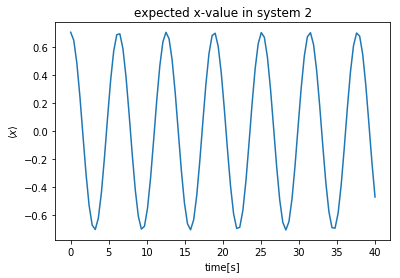

In [37]:
N=10
lam=.2
x,y=solve_Problem(N,lam)
eigval=np.sort(x)
E00=eigval[0]
E10=eigval[1]
t=np.linspace(0,40,100)
plt.plot(t,x_exp(t,E00,E10))
plt.title("expected x-value in system 2")
plt.xlabel("time[s]")
plt.ylabel(r"$\langle x \rangle$")

Probability for state $|n\rangle$:
For obvious reasons the probability to detect particle 2 in state $|0\rangle$ is always 1. For $x_1$ in the first case we have a probability of 1 to detect it in the first excited state and in the second one 1/2 for each $|0\rangle$ and $|1\rangle$.